# k-Means clustering on MidFeatures
Let's compute k-means clusters and see if they are related at all to emotions

In [2]:
## For data handling
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns


## This sets the plot style
## to have a grid on a dark background
sns.set_style("darkgrid")

In [3]:
## import KMeans
from sklearn.cluster import KMeans

Load data and do train-test split.

In [27]:
data = pd.read_csv('../Data/Mid_features/midFeaturesTrainFinal2.csv')

In [28]:
data_train, data_test = train_test_split(data.copy(),
                                   shuffle=True,
                                   random_state=608,
                                   stratify=data.Emotion,
                                   test_size=0.2
                                   )

In [29]:
# Get rid of the labels on the data before clustering
X_train = data_train.drop(columns = ['FileID', 'actorID', 'Emotion', 'SentenceID' ])
X_test = data_test.drop(columns = ['FileID', 'actorID', 'Emotion', 'SentenceID' ])


## Compute k-Means clustering
You only need to run this once because it saves the results to disk. You can skip to the analysis section if you already have a label file.

In [30]:
# make the kmeans object
kmeans = KMeans(6)

# fit to the training set
kmeans.fit(X_train)

# get the predicted cluster numbers for points in the training set
clusters = kmeans.predict(X_train)

# Save the clusters to a .txt file, so we don't have to run this again!
np.savetxt('k_means_labels.txt', clusters)

## Analyze the k-Means results
We plot the distribution of emotions in each cluster. If each cluster has mostly one emotion in it, we'll have a good idea of the structure of the dataset.

In [31]:
# load the clustering data from disk (if we didn't calculate it again)
clusters = np.loadtxt('k_means_labels.txt').astype(int)

In [32]:
data_train['Cluster'] = clusters

# What are the proportions of different emotions in the different clusters?
for c in range(6):
    df = data_train.loc[data_train.Cluster == c]
    emo_vals = df.Emotion.value_counts(normalize=True, sort=False)
    print('The data in cluster ', c, ' have the following emotional frequencies:')
    print(emo_vals)


The data in cluster  0  have the following emotional frequencies:
NEU    0.135458
ANG    0.215139
FEA    0.138114
DIS    0.213811
SAD    0.122178
HAP    0.175299
Name: Emotion, dtype: float64
The data in cluster  1  have the following emotional frequencies:
ANG    0.179592
FEA    0.175510
NEU    0.177551
DIS    0.169388
SAD    0.122449
HAP    0.175510
Name: Emotion, dtype: float64
The data in cluster  2  have the following emotional frequencies:
NEU    0.230871
ANG    0.081794
FEA    0.183377
DIS    0.130607
SAD    0.220317
HAP    0.153034
Name: Emotion, dtype: float64
The data in cluster  3  have the following emotional frequencies:
NEU    0.171838
ANG    0.187351
FEA    0.147971
DIS    0.192124
SAD    0.140811
HAP    0.159905
Name: Emotion, dtype: float64
The data in cluster  4  have the following emotional frequencies:
NEU    0.196676
ANG    0.113573
FEA    0.182825
DIS    0.137119
SAD    0.204986
HAP    0.164820
Name: Emotion, dtype: float64
The data in cluster  5  have the followi

In [33]:
# Get a list L of dicts, where each dict has type emo:freq for one of the clusters
L = []

for c in range(6):
    df = data_train.loc[data_train.Cluster == c]
    emo_vals = df.Emotion.value_counts(normalize=True, sort=False)
    dict = emo_vals.to_dict()
    L.append(dict)



In [40]:
# Get a list L_emo_clusters_ordered, with entries lists of emo freqs for the clusters, 
# where emotions are ordered the same
emotions = ['ANG', 'SAD', 'HAP', 'NEU', 'FEA', 'DIS']

L_emo_clusters_ordered = []

for c in range(6):
    c_list = []
    for emo in emotions:
        freq = L[c][emo]
        c_list.append(freq)
    L_emo_clusters_ordered.append(c_list)



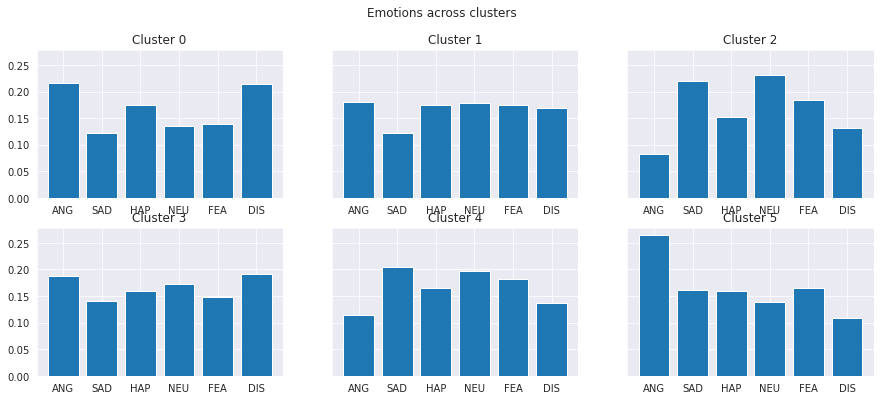

In [41]:
# Plot emotional frequency in each cluster as a bar chart
fig, axes = plt.subplots(2, 3, figsize = (15,6), sharey=True)
fig.suptitle('Emotions across clusters')


axes[0, 0].bar(emotions, L_emo_clusters_ordered[0])
axes[0, 0].set_title('Cluster 0')

axes[0, 1].bar(emotions, L_emo_clusters_ordered[1])
axes[0, 1].set_title('Cluster 1')

axes[0, 2].bar(emotions, L_emo_clusters_ordered[2])
axes[0, 2].set_title('Cluster 2')

axes[1, 0].bar(emotions, L_emo_clusters_ordered[3])
axes[1, 0].set_title('Cluster 3')

axes[1, 1].bar(emotions, L_emo_clusters_ordered[4])
axes[1, 1].set_title('Cluster 4')

axes[1, 2].bar(emotions, L_emo_clusters_ordered[5])
axes[1, 2].set_title('Cluster 5')

plt.show()



Unfortunately, there is no clear relationship between the k-means clusters and the emotions.